# Simple Lane Detection with OpenCV
https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0

### Cropping to a Region of Interest
Loading an Image into Memory

This image is: <class 'numpy.ndarray'> with dimensions: (516, 921, 3)


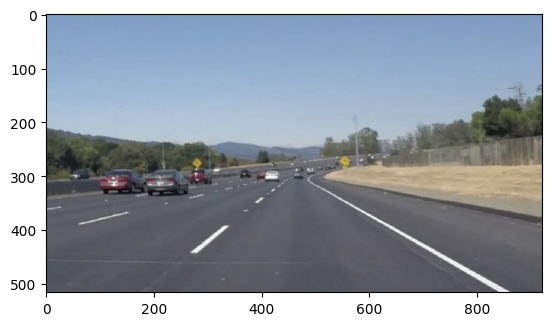

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# reading in an image
image = mpimg.imread('road.jpg')
# printing out some stats and plotting the image
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)
plt.show()

## hello

In [4]:
import numpy as np
import cv2
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [5]:
height = image.shape[0]
width = image.shape[1]
print(height)
print(width)

516
921


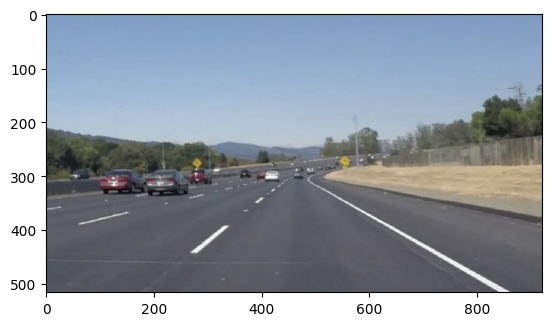

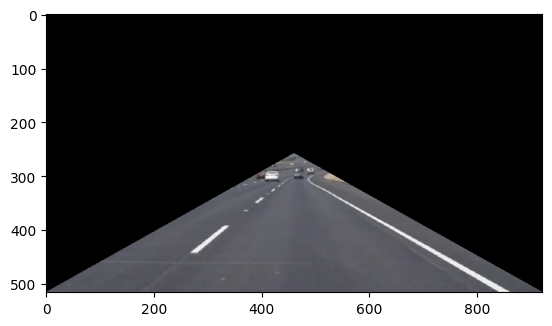

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('road.jpg')
plt.imshow(image)
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

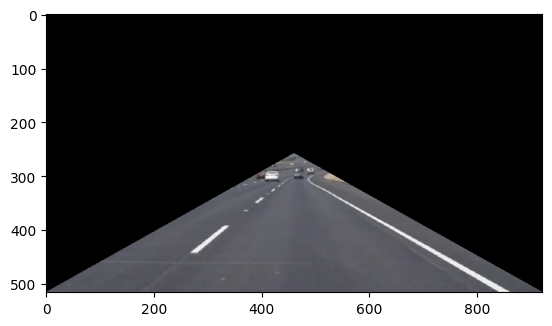

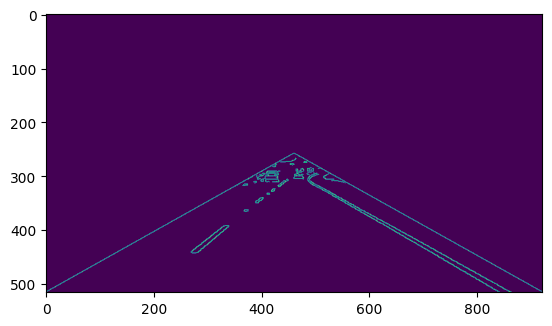

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('road.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

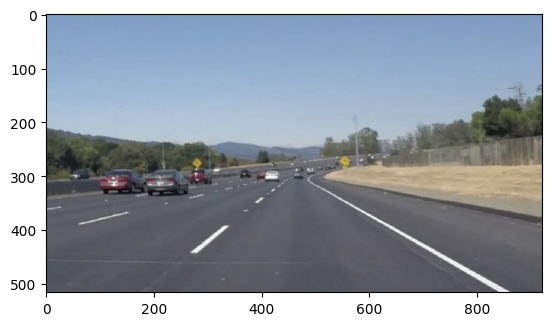

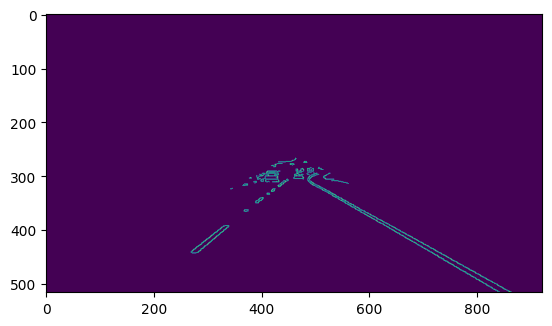

In [8]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.
    
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('road.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

In [9]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
    # Make a copy of the original image.
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    # Merge the image with the lines onto the original.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    # Return the modified image.
    return img

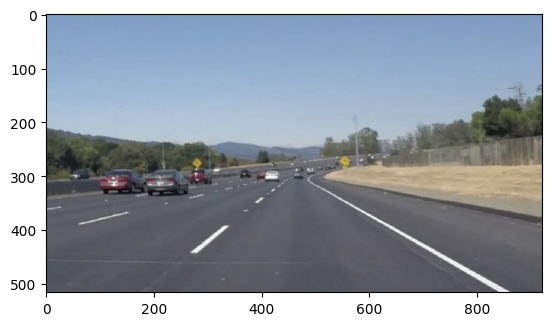

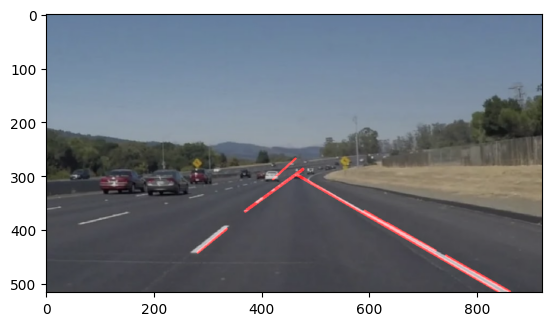

In [10]:
image = mpimg.imread('road.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()